In [2]:
import cv2
from operator import itemgetter
from glob import glob
import matplotlib.pyplot as plt
import numpy as np


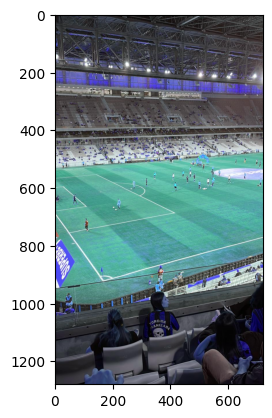

In [3]:
paper = cv2.imread('example.jpg')
plt.imshow(paper)

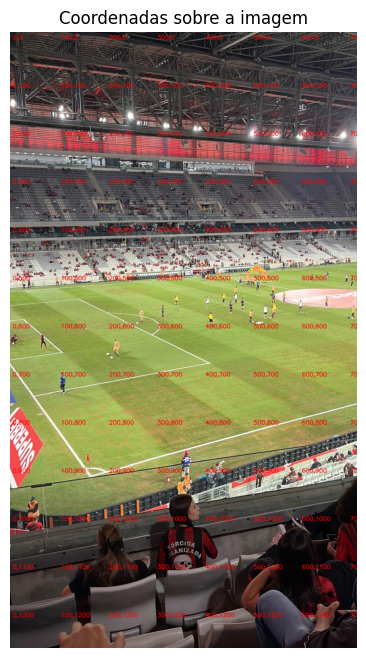

In [ ]:

imagem = cv2.imread('example.jpg')
imagem_rgb = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)

# Copia da imagem para desenhar
imagem_com_coords = imagem_rgb.copy()

altura, largura = imagem_com_coords.shape[:2]
for y in range(0, altura, 100):
    for x in range(0, largura, 100):
        texto = f"{x},{y}"
        cv2.putText(imagem_com_coords, texto, (x+5, y+15),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.4, (255, 0, 0), 1, cv2.LINE_AA)

# Exibe no Jupyter com matplotlib
plt.figure(figsize=(10, 8))
plt.imshow(imagem_com_coords)
plt.title("Coordenadas sobre a imagem")
plt.axis('off')
plt.show()


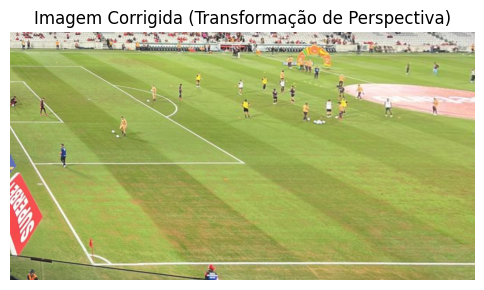

In [ ]:
# pontos originais
# importante ressaltar que a ordem dos pontos interfere no resultado da imagem
pontos_originais = np.float32([
    [0, 500],   # ponto 1
    [700, 450],   # ponto 2
    [700, 800],   # ponto 3
    [0, 1000]     # ponto 4
])

# tamanho da imagem final
largura, altura = 1500, 800

pontos_destino = np.float32([
    [0, 0],
    [largura, 0],
    [largura, altura],
    [0, altura]
])


matriz = cv2.getPerspectiveTransform(pontos_originais, pontos_destino)
imagem_corrigida_bgr = cv2.warpPerspective(imagem, matriz, (largura, altura))
imagem_corrigida_rgb = cv2.cvtColor(imagem_corrigida_bgr, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(6, 8))
plt.imshow(imagem_corrigida_rgb)
plt.title('Imagem Corrigida (Transformação de Perspectiva)')
plt.axis('off')
plt.show()